# **Tareas 8.1 y 8.2: Regresión Logística**

Estudiante: Alejandra Arciniegas Marin, C.C 1000 662 159

In [46]:
#@title Importar librerías

from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import make_classification,make_circles
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression


import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [47]:
#@title Importar los datos

In [48]:
iris = datasets.load_iris()
X = iris["data"]
Y = iris["target"]
names_features = iris["feature_names"]
names_target = iris["feature_names"]
df = pd.DataFrame(X, columns=names_features)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
#@title Renombrar las columnas

columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols= [col.replace(")" ,"") for col in columns_name ]
df.columns=cols
df["Target"]=Y
df

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [50]:
#@title Hacer la separación con estratificación y definir el conjunto de datos de entrenamiento y de prueba
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

df_train = strat_train_set
df_test = strat_test_set

# Tarea 8.1

¿Entrenar con más caracteristicas y con base a las probabilidades y dado un input  definir a  que clase pertenece: 'versicolor', 'virginica' ?

Por ejemplo dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?




Para clasificar en cada tipo, hago una primera clasificación para ver si es de tipo setosa o no setosa (cualquiera de las otras dos), luego una para ver si es versicolor o no versicolor y lo mismo para la última clase.

In [51]:
#@title Clasificación tipo 0: Setosa

#Seleccion de valores de y para las setosas, que es el target 0
#Entrenar con más características implica tomar todas las columnas de la tabla a excepción del Target
y_train_setosa = (df_train['Target'] == 0).astype(float) # forma rápida, se puede one hot enconder
X_train_setosa = df_train.iloc[:,0:4].values #En lugar de tomar solo la primera columna, las tomo todas menos el target

y_test_setosa = (df_test['Target'] == 0).astype(float)
X_test_setosa = df_test.iloc[:,0:4].values

log_reg_setosa = LogisticRegression()
log_reg_setosa.fit(X_train_setosa, y_train_setosa)

#Score datos de prueba y de entrenamiento
print(f'El puntaje de entrenamiento para clasificar en Setosa es: {log_reg_setosa.score(X_train_setosa,y_train_setosa)}')
print(f'El puntaje de prueba para clasificar en Setosa es:{log_reg_setosa.score(X_test_setosa,y_test_setosa)}')


El puntaje de entrenamiento para clasificar en Setosa es: 1.0
El puntaje de prueba para clasificar en Setosa es:1.0


In [52]:
#@title Clasificación tipo 1: Versicolor

#Seleccion de valores de y para las versicolor, que es el target 1
# TEntrenar más características implica tomar todas las columnas de la tabla a excepción del Target
y_train_versicolor = (df_train['Target'] == 1).astype(float) # forma rapida, se puede one hot enconder
X_train_versicolor = df_train.iloc[:,0:4].values

y_test_versicolor = (df_test['Target'] == 1).astype(float)
X_test_versicolor = df_test.iloc[:,0:4].values

log_reg_versicolor = LogisticRegression()
log_reg_versicolor.fit(X_train_versicolor, y_train_versicolor)

#Score datos de prueba y de entrenamiento
print(f'El puntaje de entrenamiento para clasificar en versicolor es: {log_reg_versicolor.score(X_train_versicolor,y_train_versicolor)}')
print(f'El puntaje de prueba para clasificar en versicolor es: {log_reg_versicolor.score(X_test_versicolor,y_test_versicolor)}')

El puntaje de entrenamiento para clasificar en versicolor es: 0.725
El puntaje de prueba para clasificar en versicolor es: 0.7


In [53]:
#@title Clasificación tipo 2: Virgínica

#Seleccion de valores de y para virginica, que es el target 2
# TEntrenar más características implica tomar todas las columnas de la tabla a excepción del Target
y_train_virginica = (df_train['Target'] == 2).astype(float) # forma rapida, se puede one hot enconder
X_train_virginica = df_train.iloc[:,0:4].values

y_test_virginica = (df_test['Target'] == 2).astype(float)
X_test_virginica = df_test.iloc[:,0:4].values

log_reg_virginica = LogisticRegression()
log_reg_virginica.fit(X_train_virginica, y_train_virginica)

#Score datos de prueba y de entrenamiento
print(f'El puntaje de entrenamiento para clasificar en Virginica es: {log_reg_virginica.score(X_train_virginica,y_train_virginica)}')
print(f'El puntaje de prueba para clasificar en Virginica es: {log_reg_virginica.score(X_test_virginica,y_test_virginica)}')

El puntaje de entrenamiento para clasificar en Virginica es: 0.975
El puntaje de prueba para clasificar en Virginica es: 0.9666666666666667


In [54]:
#Definir las características de entrada con las cuales quiero calcular la probabilidad de pertenecer a un tipo de flor
X = np.array([4.9,5.0, 1.8, 0.3])
X = X.reshape(1,-1)

#Imprimir las probabilidades, teniendo en cuenta que la función predict_proba devolverá un arreglo de dimensiones 1x3
print(f'Probabilidad de ser setosa: {log_reg_setosa.predict_proba(X)[0][1]}')
print(f'Probabilidad de ser versicolor: {log_reg_versicolor.predict_proba(X)[0][1]}')
print(f'Probabilidad de ser virginica: {log_reg_virginica.predict_proba(X)[0][1]}')

#Con certeza se puede decir que esta flor es una setosa

Probabilidad de ser setosa: 0.9864365959832107
Probabilidad de ser versicolor: 0.007752749403927674
Probabilidad de ser virginica: 7.260106801151703e-06


# SOFTMAX REGRESION

La elección anterior es conocida com softmax regresión, que permite definir un conjunto de probabilidades asociadas a un conjunto de clases. Al definir el maximo valor de la probabilidad dado un conjunto de inputs se tiene el objeto que predice el modelo, una forma de hacer una implementación rapida.

# Tarea 8.2


In [57]:
#@title 1. Entrenar el modelo anterior para un número mayor de caracteristicas

'''
Aquí nuevamente, para tener en cuenta todas las características solo es necesario incluir todas las columnas, por lo cual solo es necesario cambiar el valor final del intervalo
de la línea 9
'''

#Para todas las clases se puede realizar facilmente a traves de lo siguiente
y_train = df_train['Target']
X_train = df_train.iloc[:,0:4].values

y_test = df_test['Target']
X_test = df_test.iloc[:,0:4].values

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", \
                                 C=10, random_state=42)

softmax_reg.fit(X_train, y_train)

#Probar con la entrada de prueba X que habíamos definido anteriormente
probabilidades = softmax_reg.predict_proba(X)
print(f'Probabilidad de pertenecer a la clase setosa: {probabilidades[0][0]}')
print(f'Probabilidad de pertenecer a la clase versicolor: {probabilidades[0][1]}')
print(f'Probabilidad de pertenecer a la clase virginica: {probabilidades[0][2]}')

print(f'Puntaje de entrenamiento: {softmax_reg.score(X_train, y_train)}')
print(f'Puntaje de prueba: {softmax_reg.score(X_test, y_test)}')


Probabilidad de pertenecer a la clase setosa: 0.9993426165707305
Probabilidad de pertenecer a la clase versicolor: 0.0006573834292652199
Probabilidad de pertenecer a la clase virginica: 4.270305887738741e-15
Puntaje de entrenamiento: 0.975
Puntaje de prueba: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
#@title 2. Analizar que pasa con la regularaización.
'''La función LogisticRegression tiene regularización l2 por defecto, de modo que todos los cálculos hechos anteriormente la tuvieron en cuenta.
 Para ver que pasa sin ella, necesitamos pasarle un parámetro adicional a la función que es Penalty = None'''

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", \
                                 C=10, random_state=42, penalty = None)
softmax_reg.fit(X_train, y_train)


#Probar con la entrada de prueba X que habíamos definido anteriormente
probabilidades = softmax_reg.predict_proba(X)

print(f'Probabilidad de pertenecer a la clase setosa: {probabilidades[0][0]}')
print(f'Probabilidad de pertenecer a la clase versicolor: {probabilidades[0][1]}')
print(f'Probabilidad de pertenecer a la clase virginica: {probabilidades[0][2]}')

print(f'Puntaje de entrenamiento: {softmax_reg.score(X_train, y_train)}')
print(f'Puntaje de prueba: {softmax_reg.score(X_test, y_test)}')

'''
Sin regularización, la clasificación en Setosa nos da con mayor certeza, pues es más grande la probabilidad obtenida y las otras más pequeñas. De igual forma,
sin regularización el comportamiento del puntaje de entrenamiento es mejor que con regularización mientras que para los de prueba es igual de bueno en ambas.
'''

Probabilidad de pertenecer a la clase setosa: 1.0
Probabilidad de pertenecer a la clase versicolor: 9.144208389845218e-31
Probabilidad de pertenecer a la clase virginica: 4.840133330499552e-57
Puntaje de entrenamiento: 0.9833333333333333
Puntaje de prueba: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


'\n\n'

3. Hacer una analisis de las metricas, construir curvas de aprendizaje para todo el conjunto de datos.


Para construir la curva de aprendizaje de los datos se puede utilizar la función model_selection.learning_curve de sklearn y se deben calcular las medias y desviaciones estandar de los datos tanto de prueba como de entrenamiento para así lograr construir la sombra alrededor de la curva. También se necesita calcular el cross_validation_score que lo que hace es ver como se comporta el modelo fuera de los datos con los que fue probado y entrenado.

A partir de la diferencia entre las curvas del Training score y el cross validation score, y de el ancho de las sombras (que me indican el error), puedo hacer un análisis de si los datos tienen overfitting, underfittting o un buen ajuste.

| Tipo de Ajuste | Training Score | Cross-Validation Score | Diferencia entre ambos |
|----------------|----------------|------------------------|------------------------|
| Overfitting    | Alto           | Bajo                   | Alta                   |
| Underfitting   | Bajo           | Bajo                   | Baja                   |
| Buen ajuste    | Alto           | Alto                   | Baja                   |


| Situación        | Sombra en Training Score | Sombra en Cross-Validation Score | Conclusión sobre Ajuste |
|------------------|-------------------------|----------------------------------|--------------------------|
| Overfitting      | Estrecha                | Ancha                            | Sobreajuste, falta de generalización |
| Underfitting     | Ancha                   | Ancha                            | Subajuste, modelo demasiado simple    |
| Buen ajuste      | Estrecha                | Estrecha                         | Modelo bien ajustado y generalizable  |


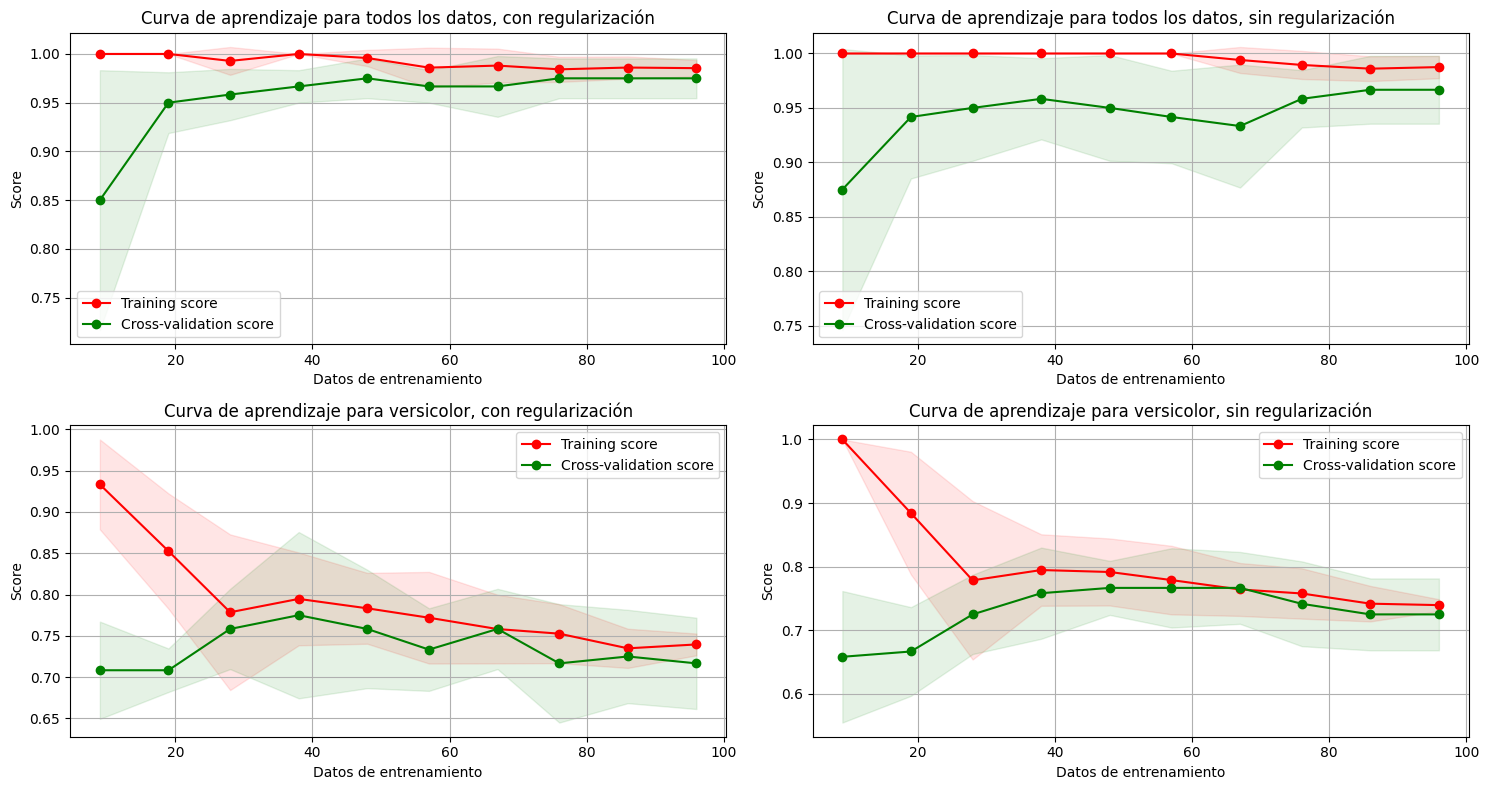

In [60]:
#Definir una función para calcular y graficar dentro de un subplot las curvas de aprendizaje

def plot_learning_curve(X_train, y_train, rows, cols, index, regularizacion, title = 'Curva de aprendizaje (Regresión Logística)'):
    # Configurar el validador cruzado y el estimador
    cv = model_selection.ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    estimator = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42, penalty= regularizacion)

    # Calcular los tamaños de entrenamiento y las puntuaciones
    train_sizes, train_scores, test_scores = model_selection.learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calcular medias y desviaciones estándar
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Crear la subgráfica
    plt.subplot(rows, cols, index)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Datos de entrenamiento")
    plt.ylabel("Score")
    plt.grid()


plt.figure(figsize=(15, 8))

plot_learning_curve(X_train, y_train, rows=2, cols=2, index=1, regularizacion = 'l2', title = 'Curva de aprendizaje para todos los datos, con regularización')
plot_learning_curve(X_train, y_train, rows=2, cols=2, index=2, regularizacion = None, title = 'Curva de aprendizaje para todos los datos, sin regularización')
plot_learning_curve(X_train_versicolor, y_train_versicolor, rows=2, cols=2, index=3, regularizacion = 'l2', title = 'Curva de aprendizaje para versicolor, con regularización')
plot_learning_curve(X_train_versicolor, y_train_versicolor, rows=2, cols=2, index=4, regularizacion = None, title = 'Curva de aprendizaje para versicolor, sin regularización')

plt.tight_layout()
plt.show()

De las gráficas y los criterios descritos arriba, se puede ver que en general se comporta mejor el modelo cuando utilizamos todas las clases y características que cuando clasificamos para una sola característica. Además, también hay un mejor ajuste de los datos cuando se usa regularización que cuando no se usa.

En el caso de las dos primeras curvas que son para todos los datos, se puede ver que con regularización el ajuste es bueno, no se evidencia mucho overfitting porque las sombras son relativamente estrechas y la diferencia entre las curvas es baja, mientras que sin regularización se ve un claro Overfitting ya que la sombra del cross validation score es muy ancha.

En el caso de las dos segundas gráficas que son para la clasificación solo en versicolor, se puede ver que la diferencia entre los datos es baja aunque su puntaje es bastante bajo y además, ambas sombras son bastante gruesas, por lo que se considera que hay Underfitting.

4. Con base en el libro Hand on Machine learning, construir las fronteras de desición para este multiclasificador.

En el ejemplo que se realizó en el libro, se dibujaron las fronteras de clasificación teniendo en cuenta solamente 2 características; sin embargo, aquí hemos hecho todo el análisis teniendo en cuenta todas las características. Para poder hacer esto, podemos entonces hacer la regresión logística sobre todos los datos pero utilizar la función PCA de sklearn para reducir los datos originales son a 2D para así poderlos visualizar. La función PCA transforma los datos originales en un nuevo conjunto de variables, llamadas componentes principales, que son combinaciones lineales de las variables originales. La idea es representar la mayor parte de la variabilidad de los datos en menos dimensiones, simplificando el análisis o la visualización de los datos sin perder mucha información.

Luego de haber hecho dicha reducción de los datos, se puede seguir exactamente el mismo procedimiento que en el ejemplo del libro para hallar las fronteras de decisión.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


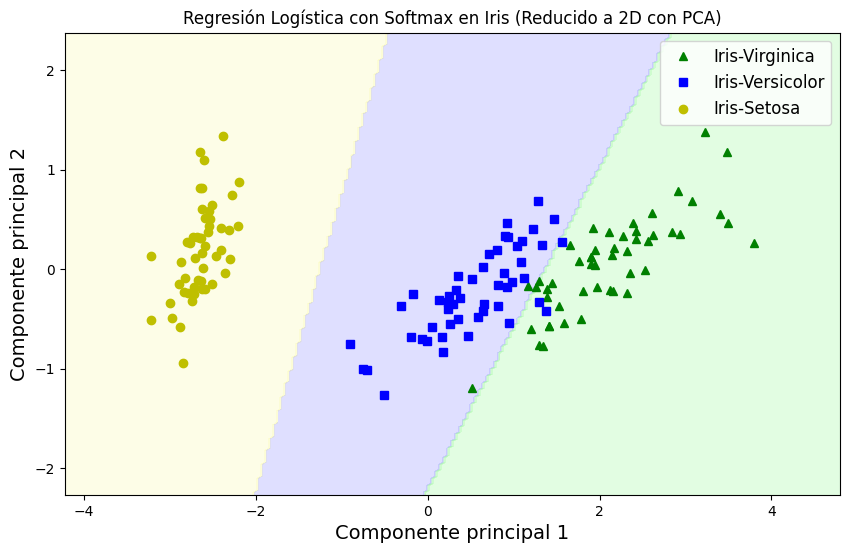

In [61]:
from sklearn.decomposition import PCA
# Cargar el conjunto de datos Iris

iris = datasets.load_iris()
X = iris["data"]  # Todas las características
y = iris["target"]

# Ajustar el modelo de regresión logística softmax
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

# Reducir los datos originales a 2D con PCA para visualización
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Crear una cuadrícula en el espacio reducido
x0_min, x0_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
x1_min, x1_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
x0, x1 = np.meshgrid(np.linspace(x0_min, x0_max, 200),
                     np.linspace(x1_min, x1_max, 200))

#Crear X_new
X_new = np.c_[x0.ravel(), x1.ravel()]

# Transformar la cuadrícula de nuevo a 4D para predecir
X_grid = pca.inverse_transform(X_new)
y_predict = softmax_reg.predict(X_grid).reshape(x0.shape)

# Configuración del gráfico
plt.figure(figsize=(10, 6))
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

# Graficar las fronteras de decisión
plt.contourf(x0, x1, y_predict, cmap=custom_cmap, alpha=0.3)

# Graficar los puntos de datos de entrenamiento en el espacio reducido
plt.plot(X_reduced[y==2, 0], X_reduced[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X_reduced[y==1, 0], X_reduced[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X_reduced[y==0, 0], X_reduced[y==0, 1], "yo", label="Iris-Setosa")

# Etiquetas y leyenda
plt.xlabel("Componente principal 1", fontsize=14)
plt.ylabel("Componente principal 2", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.title("Regresión Logística con Softmax en Iris (Reducido a 2D con PCA)")
plt.show()


Referencias

[1] http://cs229.stanford.edu/syllabus.html

[2] https://www.coursera.org/learn/machine-learning. Week 3.

[3] https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py


[4]https://scikit-learn.org/stable/datasets/toy_dataset.html